# Variational Inference Coursework
This notebook is supposed to help with your understanding of the code by providing visual insights. It is not graded and solely for that purpose.

In [15]:
# Let's import your code and matplotlib
from vi_assignment import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline
%load_ext autoreload
%autoreload
# Generate the 2D data for the coursework
## Note: You can play around with different data by passing in different means or None for random clusters.

mu = np.float64([
        [-3., -3.],
        [1., -3.],
        [0., 2.],
        [0.5, 3.],
        [3., -1.]])

K = mu.shape[0]
X, C = generate_data(mu=mu) # X are the data, C are the cluster assignments (for visualisation)
N, D = X.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


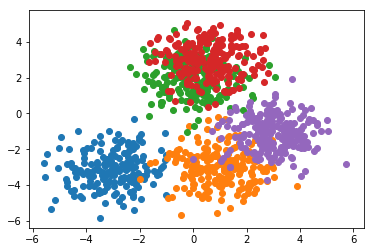

In [16]:
# Plot the data
colours = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

def plot_2d_data(X, C):

    K = int(np.max(C))
    for k in range(K+1):
        X_k = X[C == k]
        plt.scatter(X_k[:, 0], X_k[:, 1], color=colours[k])

plot_2d_data(X, C)
plt.show()

In [17]:
model = GMM_CAVI(X=X, K=K)
print(np.sum(model.s2))
model.log_joint()

10.0
[[ 3.14239476e-04  2.92512753e-04  3.17185934e-05  1.45897406e-04
  -9.24016968e-05]
 [ 2.92512753e-04  5.65149597e-04 -3.20103599e-04  4.05126184e-05
  -5.66281331e-05]
 [ 3.17185934e-05 -3.20103599e-04  4.20602306e-04  1.28496172e-04
  -4.44075725e-05]
 [ 1.45897406e-04  4.05126184e-05  1.28496172e-04  9.87481562e-05
  -5.24627927e-05]
 [-9.24016968e-05 -5.66281331e-05 -4.44075725e-05 -5.24627927e-05
   3.01189847e-05]]


-1010.7531407668333

## Run CAVI

In [3]:
# Initialise model
## Note: You can play around with different values for K.
## In a more realistic setting we might not have the cluster assignments
## and a different value of K might seem plausible (e.g. K=4)
model = GMM_CAVI(X=X, K=K)
elbo_trace = model.fit(max_iter=300, threshold=1e-6)

AssertionError: Update for pi not implemented

In [ ]:
# Plot the ELBO
def plot_elbo(trace):

    iters = np.arange(1, trace.shape[0]+1)
    plt.plot(iters, trace)
    plt.xlabel("Iteration")
    plt.ylabel("ELBO")
    
plot_elbo(elbo_trace)
plt.show()

## Plot the variational posterior

In [ ]:
def plot_2d_fit(X, C, pis, mus):

    sigmas2 = np.ones_like(mus)
    C_pred = np.argmax(pis, axis=1) # Hard cluster assignment

    fig, axarr = plt.subplots(1, 2, sharey=True, sharex=True)

    axarr[0].set(aspect="equal")
    axarr[1].set(aspect="equal")

    K = int(np.max(C))
    for k in range(K+1):

        true_c = colours[k]
        pred_c = colours[(K+1)+k]

        X_k_true = X[C == k]
        X_k_pred = X[C_pred == k]

        axarr[0].scatter(X_k_true[:, 0], X_k_true[:, 1], color=true_c)
        axarr[1].scatter(X_k_pred[:, 0], X_k_pred[:, 1], color=pred_c)

        if k < mus.shape[0]:
            mu_k = mus[k]
            sigma2_k = sigmas2[k]
            dim_k = 4*np.sqrt(sigma2_k)
            gauss_k = Ellipse(
                xy=mu_k, width=dim_k[0], height=dim_k[1],
                fc=(0, 0, 0, 0.33), lw=2., ls="--")
            axarr[1].add_artist(gauss_k)
            gauss_k.set_edgecolor("black")

            axarr[1].scatter(mu_k[0], mu_k[1], color="black")

        axarr[0].set_title("Ground truth")
        axarr[1].set_title("Variational posterior")
        
pis, mus = model.pi, model.m
plot_2d_fit(X, C, pis, mus)
plt.show()